<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
netflix_df = pd.read_csv("netflix_data.csv", index_col=0)

In [3]:
# Load Netflix dataset and set first column as index
netflix_df

type  ...             genre
show_id           ...                  
s2         Movie  ...            Dramas
s3         Movie  ...     Horror Movies
s4         Movie  ...            Action
s5         Movie  ...            Dramas
s6       TV Show  ...  International TV
...          ...  ...               ...
s7779      Movie  ...          Comedies
s7781      Movie  ...            Dramas
s7782      Movie  ...          Children
s7783      Movie  ...            Dramas
s7784      Movie  ...            Dramas

[4812 rows x 10 columns]

In [4]:
# Display dataframe and basic information about the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, s2 to s7784
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          4812 non-null   object
 1   title         4812 non-null   object
 2   director      4812 non-null   object
 3   cast          4812 non-null   object
 4   country       4812 non-null   object
 5   date_added    4812 non-null   object
 6   release_year  4812 non-null   int64 
 7   duration      4812 non-null   int64 
 8   description   4812 non-null   object
 9   genre         4812 non-null   object
dtypes: int64(2), object(8)
memory usage: 542.6+ KB


In [5]:
# Check for duplicate entries in the dataset
netflix_df.duplicated().sum()

0


questions:
What was the most frequent movie duration in the 1990s? 

In [6]:
# Filter movies released between 1990-1999
movies_1990s = netflix_df[
    (netflix_df['type'] == 'Movie') & 
    (netflix_df['release_year'].between(1990, 1999))
]

movies_1990s 

type  ...           genre
show_id         ...                
s8       Movie  ...          Dramas
s167     Movie  ...          Dramas
s211     Movie  ...        Comedies
s239     Movie  ...        Comedies
s274     Movie  ...          Dramas
...        ...  ...             ...
s7536    Movie  ...          Dramas
s7571    Movie  ...  Classic Movies
s7624    Movie  ...          Action
s7682    Movie  ...          Action
s7695    Movie  ...          Dramas

[183 rows x 10 columns]

Netflix’s 1990s movie collection peaks in the late 90s


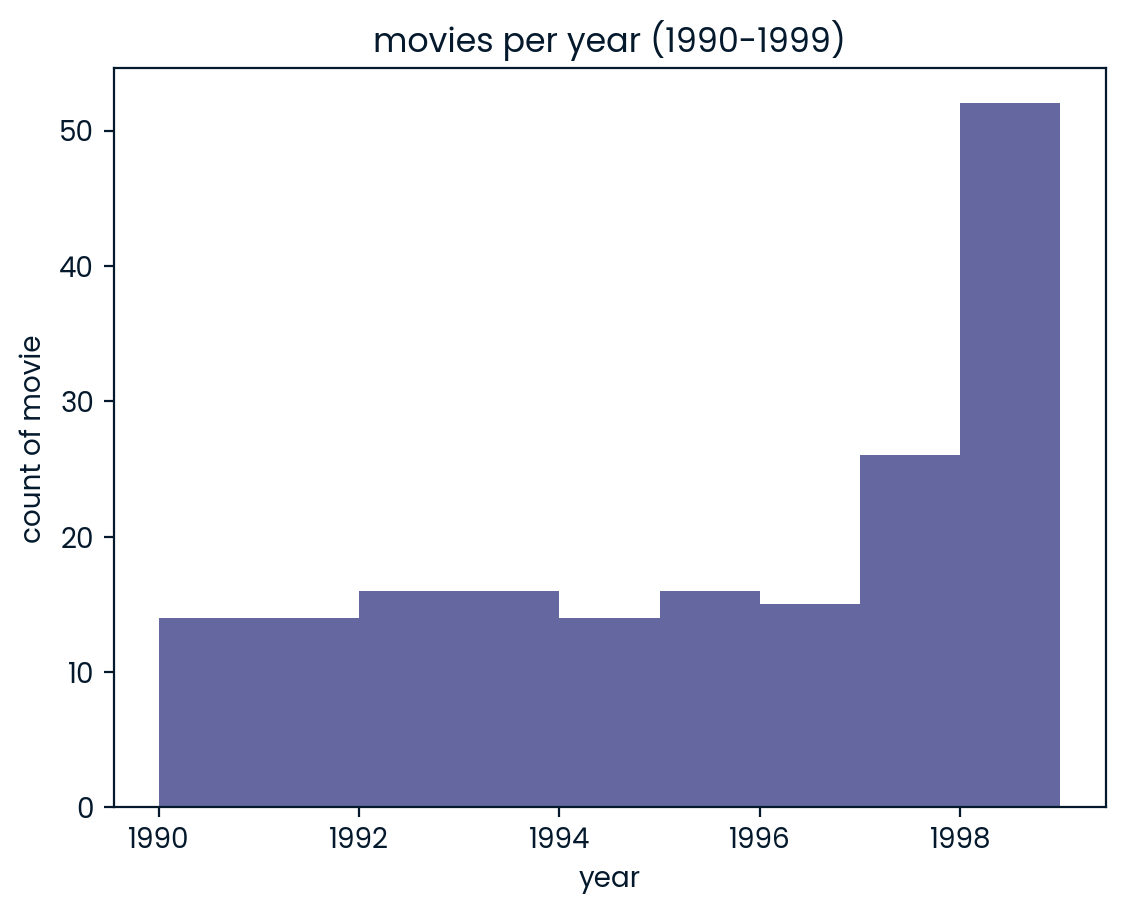

In [13]:
# Create histogram showing movie distribution by release year
plt.hist(movies_1990s["release_year"] , bins=range(1990, 2000))
plt.xlabel("year")
plt.ylabel("count of movie")
plt.title("movies per year (1990-1999)")
plt.xticks(range(1990, 2000, 2))
print('Netflix’s 1990s movie collection peaks in the late 90s')

In [12]:
# checking filtered dataset 
movies_1990s.loc[:, ["duration", "release_year", "type" , "genre"]]

duration  release_year   type           genre
show_id                                               
s8            119          1997  Movie          Dramas
s167          101          1993  Movie          Dramas
s211           82          1998  Movie        Comedies
s239          108          1996  Movie        Comedies
s274          154          1993  Movie          Dramas
...           ...           ...    ...             ...
s7536         106          1999  Movie          Dramas
s7571         118          1993  Movie  Classic Movies
s7624         106          1999  Movie          Action
s7682         191          1994  Movie          Action
s7695         148          1994  Movie          Dramas

[183 rows x 4 columns]

In [268]:
#for lab, row in movies_1990s.iterrows():
    #movies_1990s['freq'] = movies_1990s['duration']
    #print(str(row['release_year']) + ": " + str(row['duration']))

What was the most frequent movie duration in the 1990s? 

the most frequent movie duration in the 1990s : 94


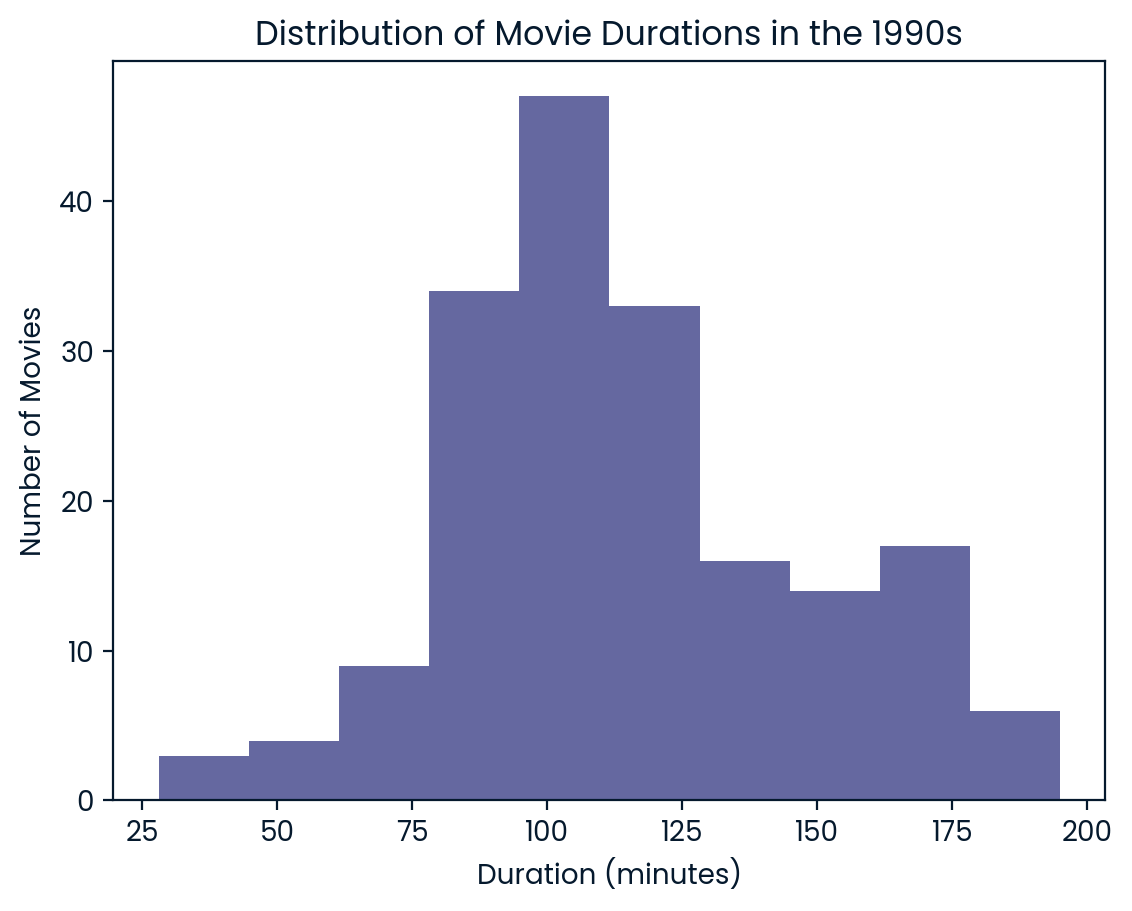

In [269]:
# most frequent movien duration = duration.mode()
duration = movies_1990s["duration"].mode()[0]
# Create histogram of movie durations
plt.hist(movies_1990s['duration'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations in the 1990s')
# Display most common movie duration
print('the most frequent movie duration in the 1990s', ':' ,duration)

In [270]:
# Analyze genre distribution
print(movies_1990s["genre"].value_counts()) 

Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Stand-Up           8
Thrillers          5
Horror Movies      4
Documentaries      2
Cult Movies        2
Name: genre, dtype: int64


Text(0.5, 1.0, 'gernes of movies released at the 1990s')

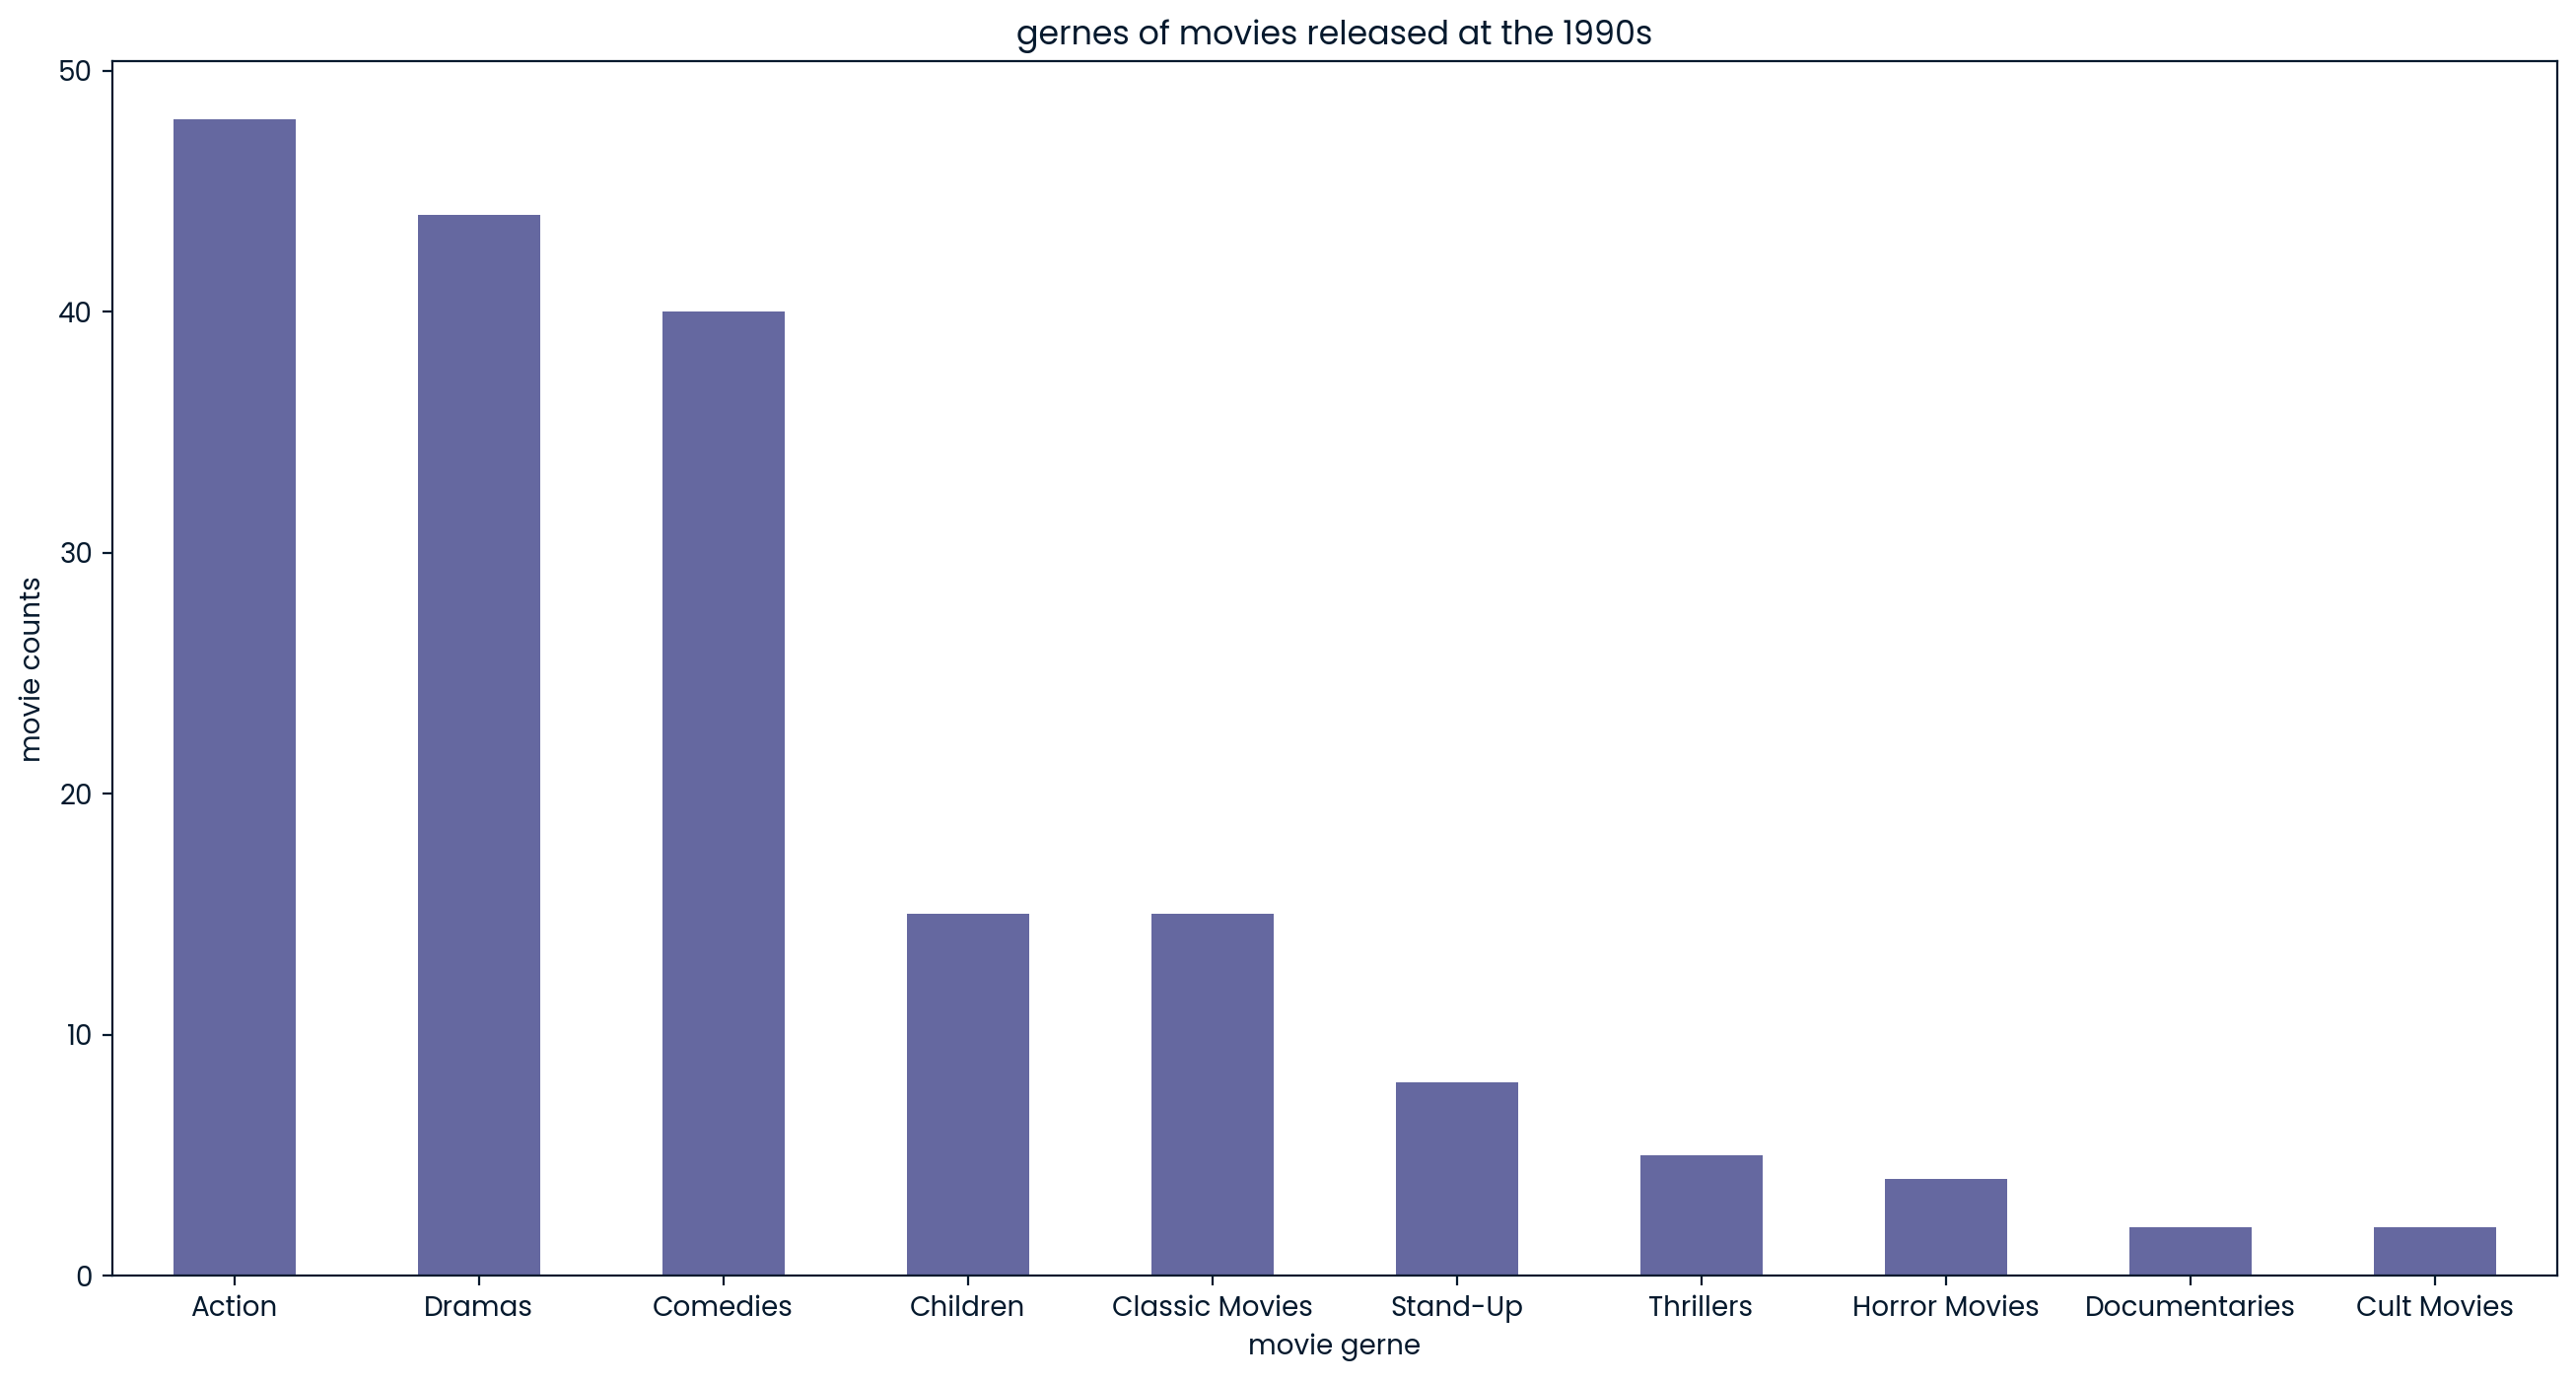

In [271]:
# Create bar chart of movie genres
movies_1990s["genre"].value_counts().plot(kind="bar" , rot=0 , figsize= (16,8))
plt.xlabel("movie gerne")
plt.ylabel("movie counts")
plt.title("gernes of movies released at the 1990s")
#most of the movies are action movies 

In [272]:
# Filter short action movies (duration < 90 minutes)
short_action_movie = movies_1990s[
    (movies_1990s["duration"] < 90) &
    (movies_1990s["genre"]=="Action")
]
# Count short action movies
short_movie_count = len(short_action_movie)
print(f"Number of short action movies: {short_movie_count}")

Number of short action movies: 7


In [273]:
# Display relevant columns of short action movies
short_action_movie.loc[ :,['duration' ,'genre', 'release_year', 'type']]

duration   genre  release_year   type
show_id                                       
s2039          69  Action          1998  Movie
s2708          89  Action          1997  Movie
s3718          88  Action          1990  Movie
s4787          84  Action          1992  Movie
s5299          89  Action          1995  Movie
s6114          83  Action          1993  Movie
s6330          87  Action          1997  Movie